<a href="https://colab.research.google.com/github/Varun-Haris/Leaf-wilt-detection/blob/master/ProjectC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


# load and display an image with Matplotlib
!pip install hyperas
!pip install hyperopt
from matplotlib import image
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D, LeakyReLU, BatchNormalization
from keras.models import Sequential, Model
from keras import optimizers
from keras.models import load_model
import tensorflow as tf
from keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.model_selection import train_test_split
import glob
import pandas as pd
from keras.layers import LSTM,Bidirectional



Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def data():
  x_train, y_train = list(), list()
  label = list()
  df = pd.read_csv("/content/gdrive/My Drive/ECE 542 Project C2/train_files_1.csv")
  path = '/content/gdrive/My Drive/ECE 542 Project C2/TrainingDataset/'
  file_names = (glob.glob("/content/gdrive/My Drive/ECE 542 Project C2/TrainingDataset/*"))
  for files in file_names:
  
    photo = image.imread(files)
    # photo = image.imread('resize_image'+files)
    x_train.append(photo)
    labels = (df.annotation[df.modified_file_name == files]).values
    # y_train.append(one_hot_encode(labels))
    y_train.append(labels)
    # y_train.append((labels))

  
  x_train = np.asarray(x_train)
  y_train = np.asarray(y_train)
  # y_train = np.transpose(y_train)
  df = pd.read_csv("/content/gdrive/My Drive/ECE 542 Project C2/test_files_1.csv")

  x_test, y_test = list(), list()
  file_names = (glob.glob("/content/gdrive/My Drive/ECE 542 Project C2/TestDataset/*"))
  for files in file_names:
  
    photo = image.imread(files)
    # photo = image.imread('resize_image'+files)
    x_test.append(photo)
    labels = (df.annotation[df.modified_file_name == files]).values
    # y_train.append(one_hot_encode(labels))
    y_test.append(labels)
    # y_train.append((labels))

  
  x_test = np.asarray(x_test)
  y_test = np.asarray(y_test)
  # y_test = np.transpose(y_test)

  x_train = x_train/255.0
  x_test = x_test/255.0
  
  
  return x_train, y_train, x_test, y_test



In [0]:
def xtrain_data():
  x_train, y_train = list(), list()
  label = list()
  df = pd.read_csv("/content/gdrive/My Drive/ECE 542 Project C2/Filename_1.csv")

  path = '/content/gdrive/My Drive/ECE 542 Project C2/ProjectC2_Training_all_class_augmented/'
  for files in df.file_name:
  
    photo = image.imread(path+files)
    # photo = image.imread('resize_image'+files)
    x_train.append(photo)
    labels = df.annotations[df.file_name == files]
    # y_train.append(one_hot_encode(labels))
    y_train.append(labels)
    # y_train.append((labels))
    print(files)

  
  x_train = np.asarray(x_train)
  label = df.annotations
  label = np.asarray(label)
  label = np.transpose(label)
  y_train = label
  #x_train, x_test, y_train, y_test = train_test_split(x_train, label, test_size=0.2, random_state=0)
  df = pd.read_csv("/content/gdrive/My Drive/ECE 542 Project C2/test_files_1.csv")

  x_test, y_test = list(), list()
  file_names = (glob.glob("/content/gdrive/My Drive/ECE 542 Project C2/TestDataset/*"))
  for files in file_names:
  
    photo = image.imread(files)
    
    x_test.append(photo)
    labels = (df.annotation[df.modified_file_name == files]).values
    y_test.append(labels)
   

  
  x_test = np.asarray(x_test)
  y_test = np.asarray(y_test)
  

  x_train = x_train/255.0
  x_test = x_test/255.0
  
  
  return x_train, y_train, x_test, y_test



In [0]:
def new_data():
  x_train, y_train = list(), list()
  label = list()
  df = pd.read_csv("/content/gdrive/My Drive/ECE 542 Project C2/train_files.csv")
  path = '/content/gdrive/My Drive/ECE 542 Project C2/ProjectC2_Training_all_class/'
  for files in df.file_name:
  
    photo = image.imread(path+files)
    # photo = image.imread('resize_image'+files)
    x_train.append(photo)
    labels = df.annotation[df.file_name == files]
    # y_train.append(one_hot_encode(labels))
    label.append(labels)
    # y_train.append((labels))

  
  x_train = np.asarray(x_train)
  label = df.annotation
  label = np.asarray(label)
  label = np.transpose(label)
  x_train, x_test, y_train, y_test = train_test_split(x_train, label, test_size=0.05, random_state=0)
  x_train = x_train/255.0
  x_test = x_test/255.0
  
  
  return x_train, y_train, x_test, y_test


In [0]:
def create_model(x_train, y_train, x_test, y_test):
    num_classes = 5
    epochs = {{choice([20])}}
    img_width = 128
    img_height = 128
    
    dpout = {{choice([0.4])}}
    model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))  
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense({{choice([512])}}, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dpout)(x)
            
    preds = Dense(num_classes, activation={{choice(['softmax'])}})(x)  # final layer with softmax activation
    
    model = Model(inputs=model.input, outputs=preds)
    
    lrate = {{choice([0.0001])}}
    
    adam = optimizers.adam(lr=lrate)
    
    model.compile(optimizer={{choice(['adam'])}},
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    b_size = {{choice([128])}}
    
    history = model.fit(x=x_train, y=y_train, epochs = epochs, batch_size = b_size, validation_data = [x_test,y_test] )
    
    score, acc = model.evaluate(x_test, y_test, verbose=0)
    
    # plots(history,epochs)
    
    print('learning rate = '+str(lrate))
    print('dropout = '+str(dpout))
    print('batch size = '+str(b_size))
    
    plt.figure(1)
    plt.plot(range(epochs),history.history['acc'])
    # plt.plot(range(epochs),accuracy[1,:])
    plt.ylabel('Training Accuracy')
    plt.xlabel('Epochs')
    plt.show()
    
    print('Test accuracy:', acc)
    print('Test loss:', score)
    
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

  

In [0]:
def model(x_train, y_train, x_test, y_test):
    # Importing the required Keras modules containing model and layers
    # Creating a Sequential Model and adding the layers
    num_classes = 5
    batch_size = 32
    epochs = 35
    lrate = 0.0001
    dpout = 0.3
    no_hidd_neurons = 128

    my_dict = {'batch_size': batch_size, 'epochs': epochs, 'no_neuron': no_hidd_neurons,
             'lrate': lrate, 'dpout': dpout, 'optimizer': 'adam', 'act_func': 'softmax', 'hidden_act': 'relu'}

    input_shape = (128, 128, 3)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    print('Add first conv networks')
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    print('Added first max pooled')
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    print('Add second conv networks')
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())

    print('Added second max pooled')
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    print('Add third conv networks')
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(my_dict['dpout']))

    print('Added third max pooled')
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    print('Add fourth conv networks')
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(BatchNormalization())
 
    print('Added fourth max pooled')
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    print('Add fifth conv networks')
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
    print('Add fifth conv networks')
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
 
    
    model.add(Flatten())  # Flattening the 2D arrays for fully connected layers so that tf.nn.relu
    model.add(Dense(512, activation='relu'))
    #model.add(BatchNormalization())

    model.add(Dropout(my_dict['dpout']))  # fraction of input layers to drop
    model.add(Dense(512, activation=my_dict['hidden_act']))
    #model.add(BatchNormalization())

    #model.add(Dropout(my_dict['dpout']))  # fraction of input layers to drop
    #model.add(Dense(512, activation=my_dict['hidden_act']))
    #model.add(BatchNormalization())

    #model.add(Dropout(my_dict['dpout']))  # fraction of input layers to drop
    #model.add(Dense(64, activation=my_dict['hidden_act']))
    #model.add(BatchNormalization())

    #model.add(Dropout(my_dict['dpout']))  # fraction of input layers to drop
    model.add(Dense(num_classes, activation='softmax'))
    adam = optimizers.adam(lr=0.001)
    model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x=x_train, y=y_train, epochs = epochs, batch_size = batch_size , validation_data = (x_test,y_test))
    
    score, acc = model.evaluate(x_test, y_test, verbose=0)
    
    # plots(history,epochs)
    
    
    
    plt.figure(1)
    plt.plot(range(epochs),history.history['acc'],label = 'Training Accuracy')
    plt.plot(range(epochs),history.history['val_acc'],label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    model.summary()
    print('Test accuracy:', acc)
    print('Test loss:', score)
    return model
    #return {'loss': -acc, 'status': STATUS_OK, 'model': model}




In [0]:
x_train, y_train, x_test, y_test = data()


In [0]:
print(y_test.shape)


(128, 1)


Add first conv networks
Added first max pooled
Add second conv networks
Added second max pooled
Add third conv networks
Added third max pooled
Add fourth conv networks
Added fourth max pooled
Add fifth conv networks
Add fifth conv networks
Train on 712 samples, validate on 128 samples
Epoch 1/35
712/712 [==============================] - 16s 22ms/step - loss: 1.4446 - acc: 0.4508 - val_loss: 1.5241 - val_acc: 0.3125
Epoch 2/35
712/712 [==============================] - 1s 1ms/step - loss: 1.2655 - acc: 0.4775 - val_loss: 1.6990 - val_acc: 0.3125
Epoch 3/35
712/712 [==============================] - 1s 1ms/step - loss: 1.1616 - acc: 0.4846 - val_loss: 1.2709 - val_acc: 0.3672
Epoch 4/35
712/712 [==============================] - 1s 2ms/step - loss: 1.1043 - acc: 0.5449 - val_loss: 1.2547 - val_acc: 0.4062
Epoch 5/35
712/712 [==============================] - 1s 2ms/step - loss: 1.0081 - acc: 0.5604 - val_loss: 1.1375 - val_acc: 0.5156
Epoch 6/35
712/712 [==============================] 

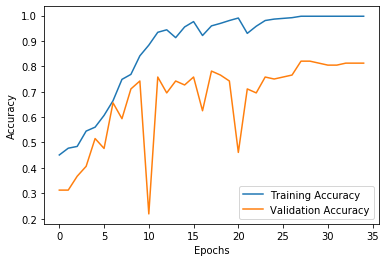

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 28, 28, 128)     

In [0]:
best_model = model(x_train, y_train, x_test, y_test)

In [0]:
new_prediction = best_model.predict_classes(x_test)
df1 = pd.DataFrame(new_prediction)
df2 = pd.DataFrame(y_test)
frame = [[np.transpose(new_prediction)],y_test]

In [0]:

new_prediction


array([1, 2, 4, 0, 0, 1, 3, 4, 2, 0, 0, 0, 0, 3, 2, 4, 2, 2, 3, 2, 1, 3,
       0, 1, 1, 0, 2, 3, 2, 1, 2, 0, 0, 2, 1, 1, 2, 3, 4, 0, 3, 0, 0, 3,
       2, 2, 1, 3, 3, 0, 4, 4, 0, 2, 0, 0, 0, 0, 3, 3, 1, 3, 0, 0, 0, 3,
       2, 1, 2, 0, 1, 4, 4, 0, 2, 0, 0, 2, 1, 1, 4, 0, 1, 0, 1, 3, 0, 3,
       0, 2, 0, 3, 3, 1, 3, 3, 1, 2, 0, 0, 2, 3, 0, 2, 0, 1, 0, 0, 4, 1,
       0, 0, 1, 0, 0, 3, 2, 1, 0, 3, 1, 0, 1, 0, 3, 3, 0, 1])

In [0]:
np.transpose(y_test)

array([[1, 3, 4, 1, 1, 1, 3, 4, 2, 0, 0, 0, 0, 3, 2, 4, 1, 2, 3, 2, 1, 3,
        1, 1, 0, 0, 2, 3, 2, 1, 2, 0, 2, 2, 1, 1, 2, 3, 4, 0, 3, 0, 0, 4,
        2, 2, 0, 4, 3, 0, 4, 4, 1, 2, 0, 0, 0, 0, 3, 3, 1, 3, 0, 0, 1, 3,
        2, 1, 1, 0, 1, 4, 4, 0, 2, 0, 1, 3, 0, 1, 4, 0, 0, 0, 1, 3, 0, 3,
        0, 2, 0, 3, 3, 1, 3, 3, 1, 2, 1, 1, 2, 4, 0, 2, 0, 1, 0, 0, 4, 1,
        0, 0, 1, 0, 0, 3, 2, 1, 0, 3, 1, 2, 0, 0, 3, 4, 0, 1]])

>>> Imports:
#coding=utf-8

try:
    from matplotlib import image
except:
    pass

try:
    from PIL import Image
except:
    pass

try:
    from keras.models import load_model
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D, LeakyReLU, BatchNormalization
except:
    pass

try:
    from keras.models import Sequential, Model
except:
    pass

try:
    from keras import optimizers
except:
    pass

try:
    from keras.models import load_model
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from keras.applications.resnet50 import ResNet50, preprocess_input
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import glob
except:
    pass

try:
    import pandas as pd
except:
    pass


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '



Train on 712 samples, validate on 128 samples
Epoch 1/20
128/712 [====>.........................]
 - ETA: 1:16 - loss: 2.5604 - acc: 0.1641

256/712 [=========>....................]
 - ETA: 30s - loss: 2.1821 - acc: 0.3438 

384/712 [===============>..............]
 - ETA: 14s - loss: 1.9508 - acc: 0.4271

512/712 [====================>.........]
 - ETA: 6s - loss: 1.6792 - acc: 0.5078 

640/712 [=========================>....]
 - ETA: 2s - loss: 1.5178 - acc: 0.5437

712/712 [==============================]
 - 21s 29ms/step - loss: 1.4515 - acc: 0.5646 - val_loss: 2.3585 - val_acc: 0.5156

Epo

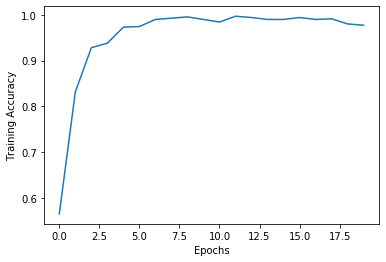

Test accuracy:
0.6015625
Test loss:
1.8793799579143524
 50%|█████     | 1/2 [01:16<01:16, 76.08s/it, best loss: -0.6015625]

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '



Train on 712 samples, validate on 128 samples
Epoch 1/20
128/712 [====>.........................]
 - ETA: 1:22 - loss: 2.9776 - acc: 0.1172

256/712 [=========>....................]
 - ETA: 32s - loss: 2.5444 - acc: 0.2891 

384/712 [===============>..............]
 - ETA: 16s - loss: 2.2266 - acc: 0.3672

512/712 [====================>.........]
 - ETA: 7s - loss: 1.9779 - acc: 0.4492 

640/712 [=========================>....]
 - ETA: 2s - loss: 1.8439 - acc: 0.4875

712/712 [==============================]
 - 22s 31ms/step - loss: 1.7750 - acc: 0.5028 - val_loss: 11.4642 - val_acc: 0.1953

Ep

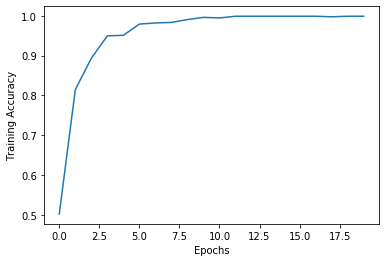

Test accuracy:
0.75
Test loss:
1.1820207238197327
100%|██████████| 2/2 [02:36<00:00, 77.35s/it, best loss: -0.75]     


In [0]:
from hyperas import optim
from hyperopt import Trials, tpe
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          max_evals=2,
                                          algo=tpe.suggest,
                                          notebook_name='/gdrive/My Drive/Colab Notebooks/ProjectC2', # This is important!
                                          trials=Trials())







In [0]:
best_model.summary()


In [0]:
print(best_run)

{'Dense': 0, 'activation': 0, 'b_size': 0, 'dpout': 0, 'epochs': 0, 'lrate': 0, 'optimizer': 0}


In [0]:
# See: https://stackoverflow.com/questions/49920031/get-the-path-of-the-notebook-on-google-colab
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='projectc1.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('projectc1.ipynb')

In [0]:

path = '/content/gdrive/My Drive/ECE 542 Project C2/'
file = 'best_model_82_acc.h5'
best_model.save(path+file)
model_file = drive.CreateFile({'title' : file})                       
model_file.SetContentFile(path+file)                       
model_file.Upload()
